In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read csv file into a pandas dataframe
df = pd.read_csv("data2.csv")

In [ ]:
# Take a look at dataset
df

In [ ]:
#Checking for the missing values
print(df.isnull().sum())

In [ ]:
#In this column, there’s four missing values.  n.a   NA  ..   na
# Making a list of missing value types
missing_values = ["n.a.", "na", "..","n/a","n.a"]
df = pd.read_csv("academic.csv", na_values = missing_values)

In [ ]:
#Checking for the missing values
print(df.isnull().sum())

In [ ]:
# drop all rows with atleast one NaN
new_df = df.dropna(axis = 0, how ='any')  
print(new_df)

In [ ]:
# drop all rows with all NaN
new_df = df.dropna(axis = 0, how ='all')
print(new_df)

In [ ]:
# drop all columns with atleast one NaN
new_df = df.dropna(axis = 1, how ='any')
print(new_df)

In [ ]:
# drop all columns with all NaN
new_df = df.dropna(axis = 1, how ='all')
print(new_df)

In [ ]:
# use fillna() to replace missing values in the ‘sub1’ column with 0.
df['sub1'].fillna(0, inplace=True)# To check changes call
print(df['sub1'])

In [ ]:
# use method = 'pad’ for taking values from the previous row.
df['sub1'].fillna(method='pad', inplace=True)

In [ ]:
df['sub1']

In [ ]:
# use method = 'bfill’ for taking values from the next row.
df['sub1'].fillna(method='bfill', inplace=True)

In [ ]:
# using median
df['sub2'].fillna(df['sub2'].median(), inplace=True)

In [ ]:
df['sub2']

In [ ]:
# using mean
df['sub3'] = df['sub3'].replace(np.NaN, df['sub3'].mean())
df['sub3'][:10]

In [ ]:
# using interpolate
df['sub3'] = df['sub3'].interpolate(method='linear',limit_direction='forward',axis=0)
df['sub3'][:10]

In [ ]:
# Also do the same for categorical variables like ‘pass’.
df['pass'].fillna('FAIL', inplace=True)
print(df['pass'])

In [61]:
cnt=0
for row in df["pass"]:
  try:
    int(row)
    df.loc[cnt,"pass"]=np.NaN
  except ValueError:
    pass
  cnt+=1

In [62]:
print(df['pass'])

0      NaN
1      Yes
2       na
3       No
4       No
5      n.a
6       No
7      Yes
8      Yes
9      Yes
10    FAIL
11     Yes
12      No
13      No
14      No
15     Yes
16      No
17    FAIL
18     Yes
19     Yes
20      No
21      No
22      No
23      na
Name: pass, dtype: object


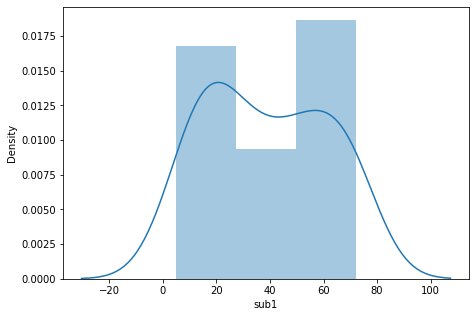

In [ ]:
# Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sub1'])
plt.show()

In [ ]:
#Finding the Boundary Values
print("Highest allowed",df['sub1'].mean() + 3*df['sub1'].std())
print("Lowest allowed",df['sub1'].mean() - 3*df['sub1'].std())

Highest allowed 105.38926605251008
Lowest allowed -28.38926605251008


In [ ]:
# Finding the Outliers
new_df = df[(df['sub1'] > 105.38) | (df['sub1'] < -28.38)]
new_df

,Roll,Name,gender,sub1,sub2,sub3,sub4,pass


In [ ]:
# Trimming of Outliers
new_df = df[(df['sub1'] < 105.38) & (df['sub1'] > -28.38)]
new_df

In [ ]:
# Capping on Outliers
upper_limit = df['sub1'].mean() + 3*df['sub1'].std()
lower_limit = df['sub1'].mean() - 3*df['sub1'].std()

In [ ]:
# Now, apply the Capping

df['sub1'] = np.where(
    df['sub1']>upper_limit,
    upper_limit,
    np.where(
        df['sub1']<lower_limit,
        lower_limit,
        df['sub1']
    )
)

In [ ]:
# Now see the statistics using “Describe” Function
print(df['sub1'].describe())